# PART 2 : ASSOCIATION RULES

## Loading the dataset

In [67]:
# First load the required arules library 
#
library("arules")


In [68]:
install.packages("arulesViz")
library("arulesViz")

Installing package into 'C:/Users/Admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'arulesViz' is in use and will not be installed"

In [69]:
# viewing the csv file
df2 = read.csv('./Supermarket_Sales_Dataset II.csv', header = F)
head(df2)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
chutney,,,,,,,,,,,,,,,,,,,
turkey,avocado,,,,,,,,,,,,,,,,,,
mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,
low fat yogurt,,,,,,,,,,,,,,,,,,,


In [70]:
# Loading our transactions dataset from our csv file
# ---
# We will use read.transactions fuction which will load data from comma-separated files 
# and convert them to the class transactions, which is the kind of data that 
# we will require while working with models of association rules
# ---
# 

Transactions <- read.transactions('./Supermarket_Sales_Dataset II.csv')


Warning message in asMethod(object):
"removing duplicated items in transactions"

## Checking the dataset

In [71]:
inspect(head(Transactions))

    items                              
[1] {cheese,energy,                    
     drink,tomato,                     
     fat,                              
     flour,yams,cottage,               
     grapes,whole,                     
     juice,frozen,                     
     juice,low,                        
     mix,green,                        
     oil,                              
     shrimp,almonds,avocado,vegetables,
     smoothie,spinach,olive,           
     tea,honey,salad,mineral,          
     water,salmon,antioxydant,         
     weat,                             
     yogurt,green}                     
[2] {burgers,meatballs,eggs}           
[3] {chutney}                          
[4] {turkey,avocado}                   
[5] {bar,whole,                        
     mineral,                          
     rice,green,                       
     tea,                              
     water,milk,energy,                
     wheat}                            


In [72]:
dim(Transactions)

[1] 7501 5729

Dataset has a total of 7501 transactions.

In [73]:
# Verifying the object's class 
class(Transactions)

[1] "transactions"
attr(,"package")
[1] "arules"

The data set has the right data type

In [140]:
# We Generate a summary of the transaction dataset.
# This should  give us some information such as the most purchased items.
# Also distribution of the item sets (no. of items purchased in each transaction), etc. 

summary(Transactions)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 5729 columns (items) and a density of 0.0005421748 

most frequent items:
    tea   wheat mineral     fat  yogurt (Other) 
    803     645     577     574     543   20157 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   15   16 
1603 2007 1382  942  651  407  228  151   70   39   13    5    1    1    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.106   4.000  16.000 

includes extended item information - examples:
                   labels
1                       &
2             accessories
3 accessories,antioxydant

In [75]:
# Exploring the frequency of some articles 
# i.e. transacations ranging from 8 to 10 and performing 
# some operation in percentage terms of the total transactions 
# 
itemFrequency(Transactions,type = "absolute")
round(itemFrequency(Transactions,type = "relative")*100,2)


& 
                                                                           371 
                                                                   accessories 
                                                                            10 
                                                       accessories,antioxydant 
                                                                             1 
                                                   accessories,champagne,fresh 
                                                                             1 
                                                 accessories,champagne,protein 
                                                                             1 
                                                         accessories,chocolate 
                                                                             1 
                                        accessories,chocolate,champagne,frozen 
                                                                             1 
                                                  accessories,chocolate,frozen 
                                                                             1 
                                                     accessories,chocolate,low 
                                                                             1 
                                              accessories,chocolate,pasta,salt 
                                                                             1 
                                              accessories,chocolate,salt,green 
                                                                             1 
                                                           accessories,cookies 
                                                                             5 
                                                           accessories,cottage 
                                                                             2 
                                                          accessories,escalope 
                                                                             1 
                                                            accessories,french 
                                                                            13 
                                                             accessories,fresh 
                                                                             2 
                                                            accessories,frozen 
                                                                             2 
                                                             accessories,green 
                                                                             7 
                                                               accessories,hot 
                                                                             3 
                                                               accessories,low 
                                                                             1 
                                                         accessories,magazines 
                                                                             1 
                                                          accessories,pancakes 
                                                                             2 
                                                   accessories,pancakes,tomato 
                                                                             1 
                                                       accessories,pasta,white 
                                                                             1 
                                                           accessories,protein 
                                                                             1 
                                                       accessories,salad,fres

& 
                                                                          4.95 
                                                                   accessories 
                                                                          0.13 
                                                       accessories,antioxydant 
                                                                          0.01 
                                                   accessories,champagne,fresh 
                                                                          0.01 
                                                 accessories,champagne,protein 
                                                                          0.01 
                                                         accessories,chocolate 
                                                                          0.01 
                                        accessories,chocolate,champagne,frozen 
                                                                          0.01 
                                                  accessories,chocolate,frozen 
                                                                          0.01 
                                                     accessories,chocolate,low 
                                                                          0.01 
                                              accessories,chocolate,pasta,salt 
                                                                          0.01 
                                              accessories,chocolate,salt,green 
                                                                          0.01 
                                                           accessories,cookies 
                                                                          0.07 
                                                           accessories,cottage 
                                                                          0.03 
                                                          accessories,escalope 
                                                                          0.01 
                                                            accessories,french 
                                                                          0.17 
                                                             accessories,fresh 
                                                                          0.03 
                                                            accessories,frozen 
                                                                          0.03 
                                                             accessories,green 
                                                                          0.09 
                                                               accessories,hot 
                                                                          0.04 
                                                               accessories,low 
                                                                          0.01 
                                                         accessories,magazines 
                                                                          0.01 
                                                          accessories,pancakes 
                                                                          0.03 
                                                   accessories,pancakes,tomato 
                                                                          0.01 
                                                       accessories,pasta,white 
                                                                          0.01 
                                                           accessories,protein 
                                                                          0.01 
                                                       accessories,salad,fres

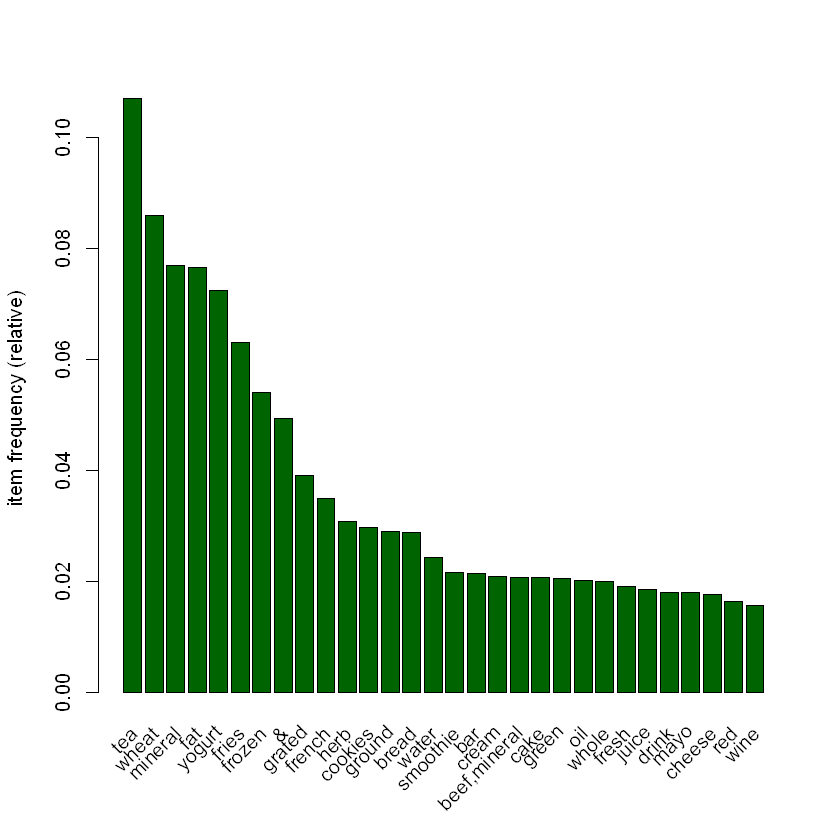

In [76]:
# Displaying top 30 most common items in the transactions dataset 
# plot the frequency of items
itemFrequencyPlot(Transactions, topN = 30,col="darkgreen")


The graph above shows first 30 most bought items. Tea is the most bought item followed by wheat and so on. Wine is the 30th most bought item

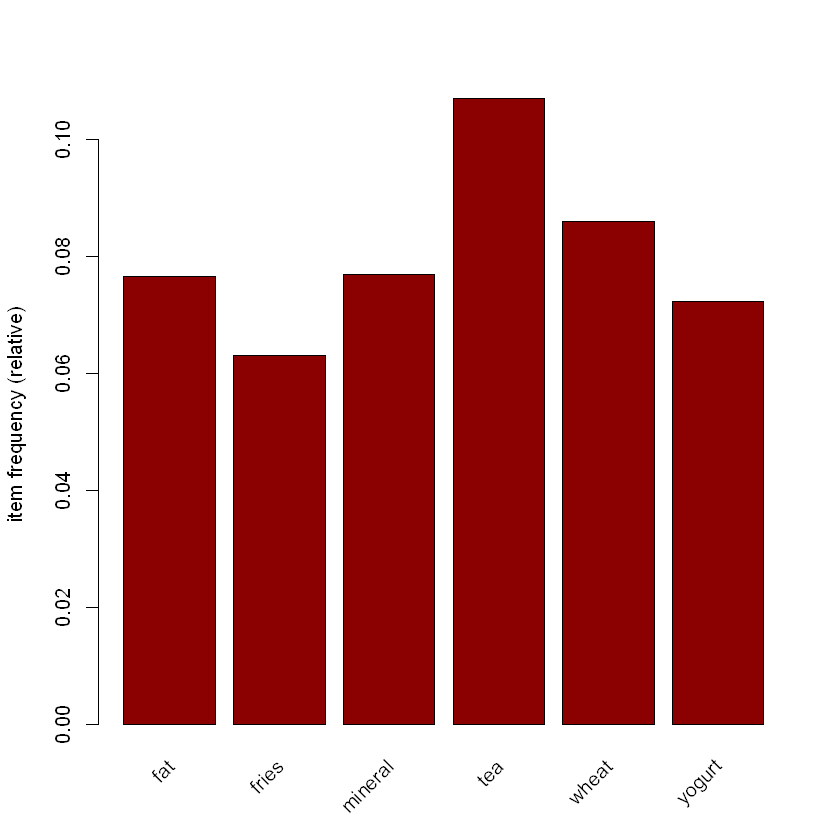

In [77]:
# Displaying the items whose relative importance is at least 6%
itemFrequencyPlot(Transactions, support = 0.06,col="darkred")

The graph above shows the items that appear in at least 6% of the total transactions. The support level can be adjusted to see the items that are most frequent and least frequent

# Building association rules

In [119]:
# Building a model based on association rules 
# using the apriori function 
# ---
# We use Min Support as 0.001 and confidence as 0.8
# ---
# 
rules <- apriori (Transactions, parameter = list(supp = 0.001, conf = 0.8, minlen = 4))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      4
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5729 item(s), 7501 transaction(s)] done [0.02s].
sorting and recoding items ... [354 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [20 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 20 rules 

The apriori functon has set 20 rules of association, given the constraints:
- support =0.001
- confidence = 0.8
- minimum length(minlen) = 4

In [120]:
# inspecting the rules
inspect(rules)

     lhs                                       rhs      support     confidence
[1]  {cream,sauce,low,yogurt}               => {fat}    0.001066524 1.0000000 
[2]  {cream,fat,sauce,low}                  => {yogurt} 0.001066524 0.8888889 
[3]  {fat,sauce,low,yogurt}                 => {cream}  0.001066524 0.8888889 
[4]  {&,herb,pepper,whole}                  => {wheat}  0.001199840 1.0000000 
[5]  {herb,pepper,whole,wheat}              => {&}      0.001199840 1.0000000 
[6]  {herb,pepper,frozen,vegetables,ground} => {&}      0.001066524 1.0000000 
[7]  {&,pepper,frozen,vegetables,ground}    => {herb}   0.001066524 0.8000000 
[8]  {fat,water,whole,yogurt}               => {wheat}  0.001199840 1.0000000 
[9]  {water,whole,wheat,yogurt}             => {fat}    0.001199840 1.0000000 
[10] {fat,water,whole,wheat}                => {yogurt} 0.001199840 1.0000000 
[11] {&,pepper,ground,yogurt}               => {fat}    0.001199840 1.0000000 
[12] {&,fat,pepper,ground}                  => {yogu

- From the above output, when the items on the lhs(left hand side) are purchased, there is a likelihood that the  items on the rhs(right hand side) will also be purchased. 

- we can also see that every rule has support, confidence and lift.
- lift is a good metric to rank the rules so I will sort the rules using lift


In [121]:
# Sorting the rules by lift
#
rules<-sort(rules, by="lift", decreasing=TRUE)
inspect(rules)

     lhs                                       rhs      support     confidence
[1]  {fat,sauce,low,yogurt}                 => {cream}  0.001066524 0.8888889 
[2]  {&,pepper,frozen,vegetables,ground}    => {herb}   0.001066524 0.8000000 
[3]  {herb,pepper,whole,wheat}              => {&}      0.001199840 1.0000000 
[4]  {herb,pepper,frozen,vegetables,ground} => {&}      0.001066524 1.0000000 
[5]  {fat,pepper,ground,yogurt}             => {&}      0.001199840 1.0000000 
[6]  {fat,herb,yogurt}                      => {&}      0.002799627 1.0000000 
[7]  {fat,water,whole,wheat}                => {yogurt} 0.001199840 1.0000000 
[8]  {cream,sauce,low,yogurt}               => {fat}    0.001066524 1.0000000 
[9]  {water,whole,wheat,yogurt}             => {fat}    0.001199840 1.0000000 
[10] {&,pepper,ground,yogurt}               => {fat}    0.001199840 1.0000000 
[11] {frozen,vegetables,mineral,yogurt}     => {fat}    0.001066524 1.0000000 
[12] {wheat,whole,yogurt}                   => {fat}

Rule one interpretation.
-  Support - The {fat,sauce,low,yogurt} and {cream} item set combination has occured a percentage of 0.1066524% in the transactions dataset.
- Confidence - There is a 88.88889% chance that when {fat,sauce,low,yogurt} is bought, {cream} will be bought
- Lift - A lift value of greater than one means that presence of the items in the LHS imply proportionally that item in the rhs will be present.
. The first rule has a lift of  42.46851, meaning that presence of {fat,sauce,low,yogurt}, will highly influence {cream} being among the items


Other rules can be created by changing the constraints

In [122]:
# Performing exploration of our model using summary function. 
summary(rules)

set of 20 rules

rule length distribution (lhs + rhs):sizes
 4 
20 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      4       4       4       4       4       4 

summary of quality measures:
    support           confidence          lift           count      
 Min.   :0.001067   Min.   :0.8000   Min.   :11.05   Min.   : 8.00  
 1st Qu.:0.001067   1st Qu.:0.8972   1st Qu.:12.12   1st Qu.: 8.00  
 Median :0.001200   Median :1.0000   Median :13.07   Median : 9.00  
 Mean   :0.001380   Mean   :0.9559   Mean   :16.18   Mean   :10.35  
 3rd Qu.:0.001200   3rd Qu.:1.0000   3rd Qu.:20.22   3rd Qu.: 9.00  
 Max.   :0.002800   Max.   :1.0000   Max.   :42.47   Max.   :21.00  

mining info:
         data ntransactions support confidence
 Transactions          7501   0.001        0.8

- MODEL INFORMATION
- size of rules - 20. 
- Rules contain 4 items as specified in the constraints.
- Statistical information on support, lift and confidence is also provided.

# Association rules implementation

In [132]:
# If interested in making a promotion relating to the sale a certain product, 
# we first create a subset of rules concerning these products 
# Then rules would tell us items that the customers bought before purchasing the particular product
# 
# Say we decide to analyse vegetable sales.

yogurt_rules.rhs <- subset(rules, subset = rhs %pin% "yogurt")
inspect (yogurt_rules.rhs)

    lhs                                rhs      support     confidence lift    
[1] {fat,water,whole,wheat}         => {yogurt} 0.001199840 1.0000000  13.81400
[2] {&,fat,pepper,ground}           => {yogurt} 0.001199840 0.9000000  12.43260
[3] {cream,fat,sauce,low}           => {yogurt} 0.001066524 0.8888889  12.27911
[4] {&,fat,herb}                    => {yogurt} 0.002799627 0.8400000  11.60376
[5] {fat,frozen,vegetables,mineral} => {yogurt} 0.001066524 0.8000000  11.05120
    count
[1]  9   
[2]  9   
[3]  8   
[4] 21   
[5]  8   


We have a total of 5 rules regarding yogurt

In [133]:
# Ordering the rules by confidence.

yogurt_rules.rhs<-sort(yogurt_rules.rhs, by="confidence", decreasing=TRUE)
inspect(yogurt_rules.rhs)

    lhs                                rhs      support     confidence lift    
[1] {fat,water,whole,wheat}         => {yogurt} 0.001199840 1.0000000  13.81400
[2] {&,fat,pepper,ground}           => {yogurt} 0.001199840 0.9000000  12.43260
[3] {cream,fat,sauce,low}           => {yogurt} 0.001066524 0.8888889  12.27911
[4] {&,fat,herb}                    => {yogurt} 0.002799627 0.8400000  11.60376
[5] {fat,frozen,vegetables,mineral} => {yogurt} 0.001066524 0.8000000  11.05120
    count
[1]  9   
[2]  9   
[3]  8   
[4] 21   
[5]  8   


- The above rules are sorted by confidence.
- There is a high likelihhod that when a customer purchases {fat,water,whole,wheat}, then they will also purchase yogurt.
- This can guide a store owner on how to organise the items. 


In [136]:
# We can also analyse what products will be bought after yogurt purchase.
# Subset the rules again

yogurt_rules.lhs <- subset(rules, subset = lhs %pin% "yogurt")
inspect(yogurt_rules.lhs)

     lhs                                   rhs     support     confidence
[1]  {fat,sauce,low,yogurt}             => {cream} 0.001066524 0.8888889 
[2]  {fat,pepper,ground,yogurt}         => {&}     0.001199840 1.0000000 
[3]  {fat,herb,yogurt}                  => {&}     0.002799627 1.0000000 
[4]  {cream,sauce,low,yogurt}           => {fat}   0.001066524 1.0000000 
[5]  {water,whole,wheat,yogurt}         => {fat}   0.001199840 1.0000000 
[6]  {&,pepper,ground,yogurt}           => {fat}   0.001199840 1.0000000 
[7]  {frozen,vegetables,mineral,yogurt} => {fat}   0.001066524 1.0000000 
[8]  {wheat,whole,yogurt}               => {fat}   0.001066524 1.0000000 
[9]  {&,herb,yogurt}                    => {fat}   0.002799627 1.0000000 
[10] {fat,water,whole,yogurt}           => {wheat} 0.001199840 1.0000000 
[11] {fat,whole,yogurt}                 => {wheat} 0.001066524 1.0000000 
     lift     count
[1]  42.46851  8   
[2]  20.21833  9   
[3]  20.21833 21   
[4]  13.06794  8   
[5]  13.0679

We have a total of eleven rules 

In [138]:
# Ordering the rules by confidence.

yogurt_rules.lhs<-sort(yogurt_rules.lhs, by="confidence", decreasing=TRUE)
inspect(yogurt_rules.lhs)

     lhs                                   rhs     support     confidence
[1]  {fat,pepper,ground,yogurt}         => {&}     0.001199840 1.0000000 
[2]  {fat,herb,yogurt}                  => {&}     0.002799627 1.0000000 
[3]  {cream,sauce,low,yogurt}           => {fat}   0.001066524 1.0000000 
[4]  {water,whole,wheat,yogurt}         => {fat}   0.001199840 1.0000000 
[5]  {&,pepper,ground,yogurt}           => {fat}   0.001199840 1.0000000 
[6]  {frozen,vegetables,mineral,yogurt} => {fat}   0.001066524 1.0000000 
[7]  {wheat,whole,yogurt}               => {fat}   0.001066524 1.0000000 
[8]  {&,herb,yogurt}                    => {fat}   0.002799627 1.0000000 
[9]  {fat,water,whole,yogurt}           => {wheat} 0.001199840 1.0000000 
[10] {fat,whole,yogurt}                 => {wheat} 0.001066524 1.0000000 
[11] {fat,sauce,low,yogurt}             => {cream} 0.001066524 0.8888889 
     lift     count
[1]  20.21833  9   
[2]  20.21833 21   
[3]  13.06794  8   
[4]  13.06794  9   
[5]  13.0679

There is a  high chance that fat, wheat or cream will be bought after a yogurt purchase

The ARM model has enabled us to come up with rules which can enable a store owner to rip more profits, through shelves organisation and deciding which products can be done promotions on.

# Challenging model.

The transactions data, could need cleaning procedures.
This is because characters like "&", are seen as products.